# K-MEANS CLUSTERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [2]:

file_path = "C:\\Users\\Hp\\Downloads\\laptops.csv"
data = pd.read_csv(file_path)

# DATA PREPROCESSING

In [3]:
# Display the first few rows of the dataset
print(data.head())


   index   brand                                              Model  Price  \
0      1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...  23990   
1      2   tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...  35990   
2      3      hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...  51100   
3      4    acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...  39990   
4      5  lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...  28580   

   Rating processor_brand processor_tier  num_cores  num_threads  ram_memory  \
0      63           intel        core i3          2            4           8   
1      67           intel        core i7          4            8          16   
2      73             amd        ryzen 5          6           12           8   
3      62           intel        core i5         12           16           8   
4      62             amd        ryzen 3          4            8           8   

   ... secondary_storage_type  secondary_storage_c

In [16]:
print(data.describe())

             index          Price      Rating   num_cores  num_threads  \
count   991.000000     991.000000  991.000000  991.000000   991.000000   
mean    505.860747   77266.504541   63.931382    8.128153    12.191726   
std     287.899458   57384.910269   10.190575    4.215499     5.585115   
min       1.000000    9800.000000   24.000000    2.000000     0.000000   
25%     258.500000   43595.000000   58.000000    6.000000     8.000000   
50%     507.000000   61900.000000   64.000000    8.000000    12.000000   
75%     754.500000   89245.000000   71.000000   10.000000    16.000000   
max    1002.000000  454490.000000   89.000000   24.000000    32.000000   

       ram_memory  primary_storage_capacity  secondary_storage_capacity  \
count  991.000000                991.000000                  991.000000   
mean    13.047427                610.938446                    4.004036   
std      5.591188                266.927666                   33.553936   
min      2.000000                

In [17]:
data.isnull().sum()

index                         0
brand                         0
Model                         0
Price                         0
Rating                        0
processor_brand               0
processor_tier                0
num_cores                     0
num_threads                   0
ram_memory                    0
primary_storage_type          0
primary_storage_capacity      0
secondary_storage_type        0
secondary_storage_capacity    0
gpu_brand                     0
gpu_type                      0
is_touch_screen               0
display_size                  0
resolution_width              0
resolution_height             0
OS                            0
year_of_warranty              0
dtype: int64

In [4]:
# Select relevant features
selected_features = ['Price', 'Rating', 'ram_memory']

In [5]:
# Preprocess categorical variables using one-hot encoding (if needed)
data_processed = pd.get_dummies(data[selected_features])


# Find the optimal number of clusters (k) using the elbow method

In [18]:
# Standardize numerical variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_processed)


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.

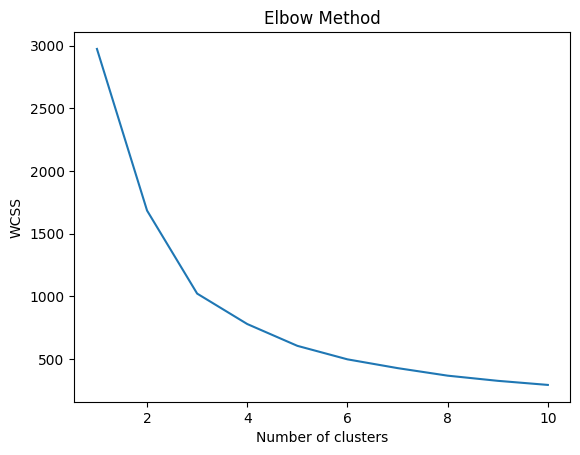

In [15]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


# K-means clustering

In [8]:
# Apply K-means clustering with the optimal number of clusters
# Based on the elbow method graph, visually select the optimal number of clusters
optimal_k = 3 
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(data_scaled)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [9]:
# 1. Get cluster centers
cluster_centers = kmeans.cluster_centers_



In [10]:
# 2. Assign clusters to data points
cluster_labels = kmeans.predict(data_scaled)



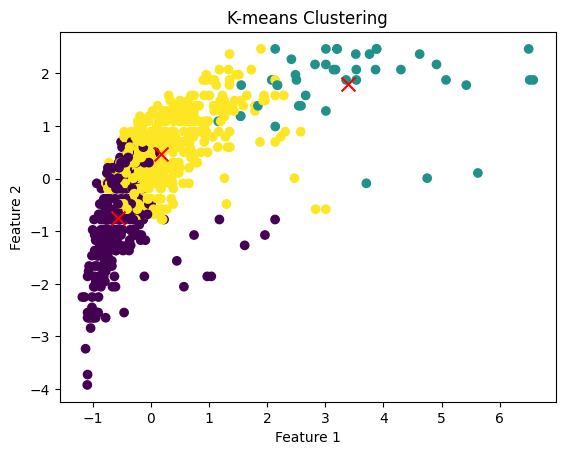

In [11]:
# 3. Visualize clusters (assuming data is two-dimensional)
import matplotlib.pyplot as plt

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()


In [12]:

# 4. Evaluate clustering
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(data_scaled, cluster_labels)
print("Silhouette Score:", silhouette_score)



Silhouette Score: 0.49992035538024987


In [13]:
# 5. Interpret clusters
for i, centroid in enumerate(cluster_centers):
    print("Cluster", i+1, "centroid:", centroid)
    # Optionally, you can print or analyze the data points belonging to each cluster
    # For example, data points with cluster_labels == i


Cluster 1 centroid: [-0.56174072 -0.75813876 -0.90404464]
Cluster 2 centroid: [3.38434559 1.79223271 2.7588902 ]
Cluster 3 centroid: [0.17822743 0.4687246  0.50781394]
